In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#layers in deep learning models.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

#The Model class is used to create and manipulate deep learning models.
from tensorflow.keras.models import Model

#Adam is an optimization algorithm commonly used for training deep learning models.
from tensorflow.keras.optimizers import Adam

#They provide functions for loading and preprocessing images to be used as input to deep learning models.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
#load the dataset
data_dir = 'DataSet/Texts'

data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 138 files belonging to 2 classes.


In [3]:
#generate image data
#split the dataset with 80% used for training and 20% for validation
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [4]:
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [5]:
#training the data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

#validate
val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 109 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [6]:
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 2 ....


In [7]:
import matplotlib.pyplot as plt

def show_img(data):
    plt.figure(figsize=(15, 15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"), aspect='auto')
            ax.axis("off")
    plt.show

In [8]:
from PIL import Image
import os

data_dir = 'DataSet/Texts'

# Iterate over each image in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.gif') or filename.endswith('.bmp'):
        # Open the image using PIL
        image = Image.open(os.path.join(data_dir, filename))
        
        # Convert the image to JPEG format
        image = image.convert('RGB')
        
        # Save the image in JPEG format
        new_filename = os.path.splitext(filename)[0] + '.jpg'
        image.save(os.path.join(image_dir, new_filename))

In [9]:
#Tesseract is an open-source OCR (Optical Character Recognition) engine
#Python library that provides an interface to the Tesseract OCR engine
!pip install pytesseract

In [10]:
pip install tesseract-ocr

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tesseract-ocr (from versions: none)
ERROR: No matching distribution found for tesseract-ocr


In [11]:
pip show tesseract

Name: tesseractNote: you may need to restart the kernel to use updated packages.
Version: 0.1.3
Summary: Tesselation based Recovery of Amorphous halo Concentrations
Home-page: http://vpac00.phy.vanderbilt.edu/~langmm/index.html
Author: Meagan Lang
Author-email: meagan.lang@vanderbilt.edu
License: UNKNOWN

Location: c:\users\admin\anaconda3\lib\site-packages
Requires: 
Required-by: 


In [12]:
pip install opencv-python

In [13]:
import cv2
import pytesseract
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from pytesseract import image_to_string

In [14]:
import os

# Set the TESSDATA_PREFIX environment variable
# Replace "/path/to/tesseract" with the actual path to your Tesseract installation directory
os.environ['TESSDATA_PREFIX'] = 'C:/Users/Admin/AppData/Local/Data'


In [15]:
# Perform OCR on the image
tessdata_dir_config = r'--tessdata-dir "C:/Users/Admin/AppData/Local/Data"'

# Set the Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'C:/Users/Admin/AppData/Local/Data/tesseract.exe'

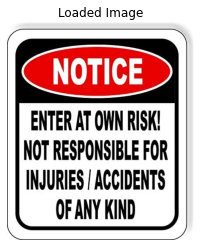

Positive sentiment


In [77]:
# Load the image using OpenCV
image = cv2.imread('Dataset/Texts/Signs/51fadtHWiQL._AC_.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Convert the image to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR to extract text from the image using Tesseract
    text = pytesseract.image_to_string(gray_image).strip()
    
    # Display the loaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()

    if text:
        # Text classification
        texts = [text]  # List of extracted texts from the image
        labels = [1]    # Corresponding labels for the extracted texts

        # Vectorize the text data
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(texts)

        # Train the classifier
        classifier = MultinomialNB()
        classifier.fit(features, labels)

        # Make predictions on the extracted text
        predictions = classifier.predict(features)

        # Print the predicted label
        if predictions[0] == 1:
            print("Positive sentiment")
        else:
            print("Negative sentiment")
    else:
        print("No text detected in the image")
else:
    print('Failed to load the image')


In [78]:
# Load and preprocess your image
image = cv2.imread('Dataset/Texts/Signs/51fadtHWiQL._AC_.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(gray_image, lang='eng')

# Print the extracted text
print(text)

ENTER AT OWN RISK!

NOT RESPONSIBLE FOR
INJURIES / ACCIDENTS
OF ANY KIND




In [79]:
pip install gTTS

Note: you may need to restart the kernel to use updated packages.


In [80]:
from gtts import gTTS
import os

# Generate speech from the extracted text
tts = gTTS(text)
tts.save("extracted_text.mp3")

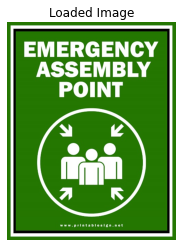

Positive sentiment


In [81]:
# Load the image using OpenCV
image = cv2.imread('Dataset/Texts/Signs/Emergency-Assembly-Point-Sign.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Convert the image to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR to extract text from the image using Tesseract
    text = pytesseract.image_to_string(gray_image).strip()
    
    # Display the loaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()

    if text:
        # Text classification
        texts = [text]  # List of extracted texts from the image
        labels = [1]    # Corresponding labels for the extracted texts

        # Vectorize the text data
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(texts)

        # Train the classifier
        classifier = MultinomialNB()
        classifier.fit(features, labels)

        # Make predictions on the extracted text
        predictions = classifier.predict(features)

        # Print the predicted label
        if predictions[0] == 1:
            print("Positive sentiment")
        else:
            print("Negative sentiment")
    else:
        print("No text detected in the image")
else:
    print('Failed to load the image')


In [82]:
import pytesseract
import cv2

# Load and preprocess your image
image = cv2.imread('Dataset/Texts/Signs/Emergency-Assembly-Point-Sign.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(gray_image, lang='eng')

# Print the extracted text
print(text)


EMERGENCY
ASSEMBLY
POINT




In [83]:
from gtts import gTTS
import os

# Generate speech from the extracted text
tts1 = gTTS(text)
tts1.save("extracted_text1.mp3")

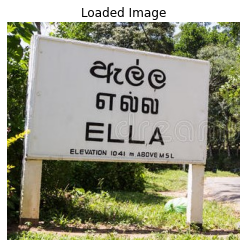

Positive sentiment


In [84]:
# Load the image using OpenCV
image = cv2.imread('Dataset/Texts/Places/ella-sri-lanka-45032521.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Convert the image to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR to extract text from the image using Tesseract
    text = pytesseract.image_to_string(gray_image).strip()
    
    # Display the loaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()

    if text:
        # Text classification
        texts = [text]  # List of extracted texts from the image
        labels = [1]    # Corresponding labels for the extracted texts

        # Vectorize the text data
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(texts)

        # Train the classifier
        classifier = MultinomialNB()
        classifier.fit(features, labels)

        # Make predictions on the extracted text
        predictions = classifier.predict(features)

        # Print the predicted label
        if predictions[0] == 1:
            print("Positive sentiment")
        else:
            print("Negative sentiment")
    else:
        print("No text detected in the image")
else:
    print('Failed to load the image')


In [85]:
# Load and preprocess your image
image = cv2.imread('Dataset/Texts/Places/ella-sri-lanka-45032521.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(gray_image, lang='eng')

# Print the extracted text
print(text)

Sheée
6T 606y
ELLA

ELEVATION 1041 m aBove wst




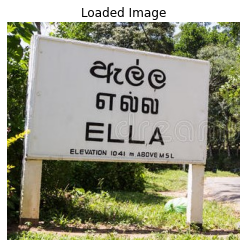

Positive sentiment


In [86]:
import cv2
import pytesseract
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the image using OpenCV
image = cv2.imread('Dataset/Texts/Places/ella-sri-lanka-45032521.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Convert the image to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR to extract text from the image using Tesseract
    text = pytesseract.image_to_string(gray_image).strip()
    
    # Display the loaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()

    if text:
        # Text classification
        texts = [text]  # List of extracted texts from the image
        labels = [1]    # Corresponding labels for the extracted texts

        # Vectorize the text data
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(texts)

        # Train the classifier
        classifier = MultinomialNB()
        classifier.fit(features, labels)

        # Make predictions on the extracted text
        predictions = classifier.predict(features)

        # Print the predicted label
        if predictions[0] == 1:
            print("Positive sentiment")
        else:
            print("Negative sentiment")
    else:
        print("No text detected in the image")
else:
    print('Failed to load the image')


In [87]:
from gtts import gTTS
import os

# Generate speech from the extracted text
tts2 = gTTS(text, lang='si')  # 'si' is the language code for Sinhala
tts2.save("extracted_text2.mp3")

In [88]:
# Load and preprocess your image
image = cv2.imread('Dataset/Texts/Places/ella-sri-lanka-45032521.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(gray_image, lang='sin')

text = pytesseract.image_to_string(gray_image, lang='sin')

# Remove numbers from the extracted text
filtered_text = re.sub(r'\d+', '', text)

# Remove non-alphanumeric characters and punctuation
filtered_text = ''.join(char for char in filtered_text if char.isalnum() or char.isspace())

# Remove short words (length <= 2 characters)
filtered_text = ' '.join(word for word in filtered_text.split() if len(word) > 2)

# Remove single-character words
filtered_text = ' '.join(word for word in filtered_text.split() if len(word) > 1)

# Print the extracted and cleaned text
print(filtered_text.strip())


ඇලල


In [89]:
# Load and preprocess your image
image = cv2.imread('Dataset/Texts/Places/ella-sri-lanka-45032521.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(gray_image, lang='tam')



# Remove numbers from the extracted text
filtered_text = re.sub(r'\d+', '', text)

# Remove non-alphanumeric characters and punctuation
filtered_text = ''.join(char for char in filtered_text if char.isalnum() or char.isspace())

# Remove short words (length <= 2 characters)
filtered_text = ' '.join(word for word in filtered_text.split() if len(word) > 2)

# Remove single-character words
filtered_text = ' '.join(word for word in filtered_text.split() if len(word) > 1)

# Print the extracted and cleaned text
print(filtered_text.strip())


கடட எலல படட


In [90]:
from gtts import gTTS
import os

# Generate speech from the extracted text
tts3 = gTTS(text, lang='ta')  # 'ta' is the language code for Tamil
tts3.save("extracted_text3.mp3")

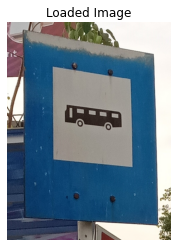

No text detected in the image


In [91]:
import cv2
import pytesseract
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the image using OpenCV
image = cv2.imread('Dataset/Signs/Bus Stop/20230510_171700324.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Convert the image to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR to extract text from the image using Tesseract
    text = pytesseract.image_to_string(gray_image).strip()
    
    # Display the loaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()

    if text:
        # Text classification
        texts = [text]  # List of extracted texts from the image
        labels = [1]    # Corresponding labels for the extracted texts

        # Vectorize the text data
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(texts)

        # Train the classifier
        classifier = MultinomialNB()
        classifier.fit(features, labels)

        # Make predictions on the extracted text
        predictions = classifier.predict(features)

        # Print the predicted label
        if predictions[0] == 1:
            print("Positive sentiment")
        else:
            print("Negative sentiment")
    else:
        print("No text detected in the image")
else:
    print('Failed to load the image')


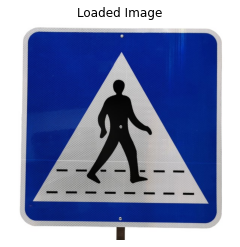

No text detected in the image


In [96]:
import cv2
import pytesseract
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the image using OpenCV
image = cv2.imread('Dataset/Signs/Crossing line/Pedestrian-Crossing-Signage.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Convert the image to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR to extract text from the image using Tesseract
    text = pytesseract.image_to_string(gray_image).strip()
    
    # Display the loaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()

    if text:
        # Text classification
        texts = [text]  # List of extracted texts from the image
        labels = [1]    # Corresponding labels for the extracted texts

        # Vectorize the text data
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(texts)

        # Train the classifier
        classifier = MultinomialNB()
        classifier.fit(features, labels)

        # Make predictions on the extracted text
        predictions = classifier.predict(features)

        # Print the predicted label
        if predictions[0] == 1:
            print("Positive sentiment")
        else:
            print("Negative sentiment")
    else:
        print("No text detected in the image")
else:
    print('Failed to load the image')


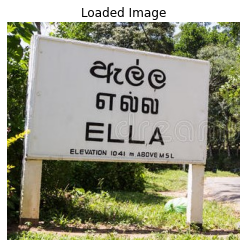

Positive sentiment


In [97]:
import cv2
import pytesseract
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the image using OpenCV
image = cv2.imread('Dataset/Texts/Places/ella-sri-lanka-45032521.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Convert the image to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR to extract text from the image using Tesseract
    text = pytesseract.image_to_string(gray_image).strip()
    
    # Display the loaded image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()

    if text:
        # Text classification
        texts = [text]  # List of extracted texts from the image
        labels = [1]    # Corresponding labels for the extracted texts

        # Vectorize the text data
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(texts)

        # Train the classifier
        classifier = MultinomialNB()
        classifier.fit(features, labels)

        # Make predictions on the extracted text
        predictions = classifier.predict(features)

        # Print the predicted label
        if predictions[0] == 1:
            print("Positive sentiment")
        else:
            print("Negative sentiment")
    else:
        print("No text detected in the image")
else:
    print('Failed to load the image')


In [98]:
import cv2
import pytesseract

# Load and preprocess your image
image = cv2.imread('Dataset/Texts/Places/ella-sri-lanka-45032521.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform OCR to extract text from the image using Tesseract (English language only)
text = pytesseract.image_to_string(gray_image, lang='eng')

# Print the extracted English text
print(text)


Sheée
6T 606y
ELLA

ELEVATION 1041 m aBove wst




In [99]:
import cv2
import pytesseract
import re

# Load and preprocess your image
image = cv2.imread('Dataset/Texts/Places/ella-sri-lanka-45032521.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform OCR to extract text from the image using Tesseract (English language only)
text = pytesseract.image_to_string(gray_image, lang='eng')

# Remove numbers from the extracted text
filtered_text = re.sub(r'\d+', '', text)

# Remove short words (length <= 2 characters)
filtered_text = ' '.join(word for word in filtered_text.split() if len(word) > 2)

# Remove single-character words
filtered_text = ' '.join(word for word in filtered_text.split() if len(word) > 1)

# Print the extracted English text without short words
print(filtered_text.strip())


Sheée ELLA ELEVATION aBove wst
